In [2]:
import numpy as np

rands = np.random.rand(100)
print(rands)
print(np.max(rands))
print(np.min(rands))

[0.39649052 0.35330184 0.8308516  0.54966385 0.25498764 0.01007452
 0.56877032 0.61764348 0.22781725 0.43222474 0.80975034 0.62341789
 0.35597765 0.93763469 0.69433243 0.39975102 0.5117112  0.15598183
 0.68670931 0.14132547 0.59277559 0.72775688 0.03313298 0.9051838
 0.72329268 0.81904745 0.76444547 0.55316845 0.59508878 0.6346739
 0.13997476 0.40110933 0.66156368 0.43185535 0.63126887 0.6353703
 0.96461759 0.73420028 0.39276396 0.70712466 0.82005811 0.07635889
 0.53570572 0.89544305 0.87067624 0.27813275 0.81317883 0.74988433
 0.65478193 0.29791327 0.77352777 0.00876234 0.15310884 0.88676427
 0.94653346 0.86731616 0.39635417 0.65455731 0.58402507 0.22094029
 0.98002589 0.72011534 0.38278575 0.89605358 0.58985413 0.84509323
 0.94491742 0.2720795  0.70477643 0.449036   0.57034753 0.6699096
 0.50085889 0.09468267 0.33884369 0.03776478 0.39375589 0.79333956
 0.84586033 0.50361658 0.95539957 0.33312639 0.14512249 0.97073263
 0.15299035 0.6158662  0.62871472 0.98173616 0.30946381 0.17982617

In [3]:
import numpy as np
from scipy.stats import multivariate_normal

# 定义多元正态分布的参数
mean = np.array([0, 0])
cov = np.array([
    [1.0, 0.0],
    [0.0, 1.0]
])

# 创建一个分布对象
dist = multivariate_normal(mean=mean, cov=cov)

# 准备多个数据点
# 这些数据点应该是一个 (N, D) 的数组
# 其中 N=3 (3个点), D=2 (二维)
multiple_data_points = np.array([
    [0.0, 0.0],  # 第一个点
    [1.0, 0.0],  # 第二个点
    [0.0, 1.0]   # 第三个点
])

# 同时传入多个数据点
# x 参数接受 (N, D) 形状的数组
pdf_values = dist.pdf(x=multiple_data_points)

print("Mean:", mean)
print("Covariance:\n", cov)
print("Multiple data points:\n", multiple_data_points)
print("PDF values for multiple data points:", pdf_values)

# 验证一下，单独计算每个点的值，看是否一致
pdf_value_1 = dist.pdf(x=np.array([0.0, 0.0]))
pdf_value_2 = dist.pdf(x=np.array([1.0, 0.0]))
pdf_value_3 = dist.pdf(x=np.array([0.0, 1.0]))

print("\nVerification (individual calculations):")
print("[0, 0] PDF:", pdf_value_1)
print("[1, 0] PDF:", pdf_value_2)
print("[0, 1] PDF:", pdf_value_3)

# 它们应该与 pdf_values 数组中的值匹配

Mean: [0 0]
Covariance:
 [[1. 0.]
 [0. 1.]]
Multiple data points:
 [[0. 0.]
 [1. 0.]
 [0. 1.]]
PDF values for multiple data points: [0.15915494 0.09653235 0.09653235]

Verification (individual calculations):
[0, 0] PDF: 0.15915494309189535
[1, 0] PDF: 0.09653235263005393
[0, 1] PDF: 0.09653235263005393


In [4]:
from numpy.linalg import inv, det
def multivariate_normal_pdf_vectorized(x, means, cov):
    d = x.shape[0]
    cov_inv = inv(cov)
    cov_det = det(cov)
    norm_const = 1.0 / np.sqrt((2 * np.pi) ** d * cov_det)

    diffs = means - x  # shape: (N, D)
    exponents = -0.5 * np.sum(diffs @ cov_inv * diffs, axis=1)  # shape: (N,)
    return norm_const * np.exp(exponents)

In [5]:
import numpy as np
from scipy.stats import multivariate_normal

# --- 1. 定义一个 2D 的多元正态分布 (协方差固定) ---
# 假设这是我们的观测噪声协方差 R
observation_covariance_R = np.array([
    [0.01, 0.00],  # sigma_x^2 = 0.01
    [0.00, 0.01]   # sigma_y^2 = 0.01
])

# 创建一个 "冻结" 的分布对象，只提供协方差，因为均值会变
# 这里我们只是为了让pdf函数能用，它的mean参数在实际调用pdf时会被覆盖
# 或者更准确地说，可以不提供mean，直接在pdf调用时指定
# dist = multivariate_normal(cov=observation_covariance_R) # 也可以这样

# --- 2. 定义一个单个观测点 x_single ---
# 假设这是机器人实际接收到的观测 (z_x, z_y)
single_observation = np.array([5.2, 3.1])

# --- 3. 定义多个不同的均值 means_multiple ---
# 这些均值代表的是：如果每个粒子是真实状态，那么我们期望的观测会是什么
# 假设有 N=5 个粒子，每个粒子的状态 (x, y, vx, vy) 不同，
# 通过 C @ state 映射到 2D 期望观测
# 这里的 means_multiple 相当于之前代码中的 expected_observations_from_states
num_particles = 5
expected_observations_for_particles = np.array([
    [5.0, 3.2],  # 粒子1的期望观测
    [5.3, 3.0],  # 粒子2的期望观测
    [4.9, 3.5],  # 粒子3的期望观测
    [5.5, 2.9],  # 粒子4的期望观测
    [5.1, 3.15]  # 粒子5的期望观测
])

print(f"Single observation (x_single) shape: {single_observation.shape}")
print(f"Multiple means (means_multiple) shape: {expected_observations_for_particles.shape}")
print(f"Observation Covariance (R) shape: {observation_covariance_R.shape}\n")

# --- 4. 使用 multivariate_normal.pdf 一次性计算 ---
# 直接调用 pdf 函数，传入单个 x 和多个 mean
# SciPy 会自动将 single_observation 广播，对每个 mean 进行计算
pdf_values_vectorized = multivariate_normal_pdf_vectorized(
    single_observation,
    expected_observations_for_particles, # 传入多个均值
    observation_covariance_R
)

print("--- Vectorized Calculation ---")
print("PDF values (vectorized):", pdf_values_vectorized)
print(f"Shape of vectorized result: {pdf_values_vectorized.shape}\n")

# --- 5. 通过循环单独计算每个情况，进行结果验证 ---
pdf_values_loop = np.zeros(num_particles)
print("--- Loop-based Verification ---")
for i in range(num_particles):
    # 为每个粒子单独创建并计算 PDF
    current_particle_mean = expected_observations_for_particles[i, :]
    
    # 直接创建临时分布对象或再次调用 pdf
    # 这里为了演示，我们直接在每次循环中传入 mean
    pdf_value_i = multivariate_normal.pdf(
        x=single_observation,
        mean=current_particle_mean, # 单个均值
        cov=observation_covariance_R
    )
    pdf_values_loop[i] = pdf_value_i
    print(f"Particle {i+1} (Mean: {current_particle_mean}): PDF = {pdf_value_i}")

print("\nPDF values (loop-based):", pdf_values_loop)

# --- 比较两种方法的结果 ---
print("\n--- Comparison ---")
if np.allclose(pdf_values_vectorized, pdf_values_loop):
    print("Vectorized and loop-based results are identical (within numerical precision).")
else:
    print("WARNING: Results differ!")

Single observation (x_single) shape: (2,)
Multiple means (means_multiple) shape: (5, 2)
Observation Covariance (R) shape: (2, 2)

--- Vectorized Calculation ---
PDF values (vectorized): [1.30642333e+00 5.85498315e+00 5.93115274e-05 2.39279779e-02
 8.51895022e+00]
Shape of vectorized result: (5,)

--- Loop-based Verification ---
Particle 1 (Mean: [5.  3.2]): PDF = 1.3064233284684859
Particle 2 (Mean: [5.3 3. ]): PDF = 5.85498315243193
Particle 3 (Mean: [4.9 3.5]): PDF = 5.931152735254172e-05
Particle 4 (Mean: [5.5 2.9]): PDF = 0.023927977920047094
Particle 5 (Mean: [5.1  3.15]): PDF = 8.518950219522608

PDF values (loop-based): [1.30642333e+00 5.85498315e+00 5.93115274e-05 2.39279779e-02
 8.51895022e+00]

--- Comparison ---
Vectorized and loop-based results are identical (within numerical precision).


In [6]:
import numpy as np
from scipy.stats import multivariate_normal

# --- 1. 定义一个 2D 的多元正态分布 (协方差固定) ---
observation_covariance_R = np.array([
    [0.01, 0.00],
    [0.00, 0.01]
])

# 创建一个 "冻结" 的分布对象，只提供协方差。
# 注意：这里mean设置为np.zeros(2)明确了维度，或者可以完全省略mean参数
# multivariate_normal(cov=observation_covariance_R) 也是可以的
# 但在pdf调用时，我们会覆盖mean参数
dist = multivariate_normal(mean=np.zeros(2), cov=observation_covariance_R)

# --- 2. 定义一个单个观测点 x_single ---
single_observation = np.array([5.2, 3.1])

# --- 3. 定义多个不同的均值 means_multiple ---
num_particles = 5
expected_observations_for_particles = np.array([
    [5.0, 3.2],
    [5.3, 3.0],
    [4.9, 3.5],
    [5.5, 2.9],
    [5.1, 3.15]
])

print(f"Single observation (x_single) shape: {single_observation.shape}")
print(f"Multiple means (means_multiple) shape: {expected_observations_for_particles.shape}")
print(f"Observation Covariance (R) shape: {observation_covariance_R.shape}\n")

# --- 4. 使用 multivariate_normal.pdf 一次性计算 ---
# 这里是关键：
# x 传入单个观测点 (D,)
# mean 传入多个期望观测点 (N, D)
# scipy.stats.multivariate_normal.pdf 内部会正确处理这种广播
# 它会计算 single_observation 相对于每一个 expected_observations_for_particles[i] 的概率密度
pdf_values_vectorized = dist.pdf(
    x=single_observation,
    mean=expected_observations_for_particles # 传入多个均值
)

print("--- Vectorized Calculation ---")
print("PDF values (vectorized):", pdf_values_vectorized)
print(f"Shape of vectorized result: {pdf_values_vectorized.shape}\n")

# --- 5. 通过循环单独计算每个情况，进行结果验证 ---
pdf_values_loop = np.zeros(num_particles)
print("--- Loop-based Verification ---")
for i in range(num_particles):
    current_particle_mean = expected_observations_for_particles[i, :]
    
    # 每次循环都针对当前粒子的均值进行计算
    pdf_value_i = dist.pdf(
        x=single_observation,
        mean=current_particle_mean, # 单个均值
    )
    pdf_values_loop[i] = pdf_value_i
    print(f"Particle {i+1} (Mean: {current_particle_mean}): PDF = {pdf_value_i}")

print("\nPDF values (loop-based):", pdf_values_loop)

# --- 比较两种方法的结果 ---
print("\n--- Comparison ---")
if np.allclose(pdf_values_vectorized, pdf_values_loop):
    print("Vectorized and loop-based results are identical (within numerical precision).")
else:
    print("WARNING: Results differ!")

Single observation (x_single) shape: (2,)
Multiple means (means_multiple) shape: (5, 2)
Observation Covariance (R) shape: (2, 2)



TypeError: multivariate_normal_frozen.pdf() got an unexpected keyword argument 'mean'

/Users/liudongxu/opt/miniconda3/envs/acv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liudongxu/opt/miniconda3/envs/acv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liudongxu/opt/miniconda3/envs/acv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liudongxu/opt/miniconda3/envs/acv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liudongxu/opt/miniconda3/envs/acv/lib/python3.13/

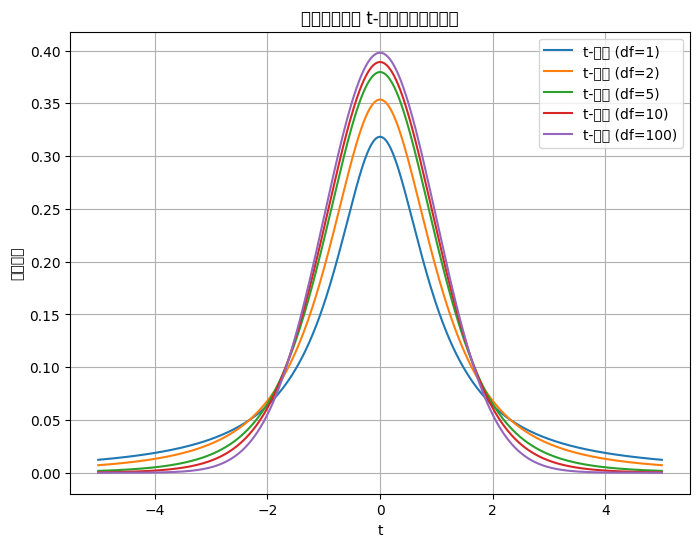

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

def plot_t_distribution(degrees_of_freedom_list, x_range=(-5, 5), num_points=1000):
    """
    绘制不同自由度的t-分布的概率密度函数 (PDF)。

    参数:
        degrees_of_freedom_list (list): 要绘制的t-分布的自由度列表。
        x_range (tuple): x轴的范围 (最小值, 最大值)。
        num_points (int): x轴上用于绘制的点的数量。
    """
    x = np.linspace(x_range[0], x_range[1], num_points)
    plt.figure(figsize=(8, 6))

    for df in degrees_of_freedom_list:
        pdf_values = t.pdf(x, df)
        plt.plot(x, pdf_values, label=f't-分布 (df={df})')

    plt.xlabel('t')
    plt.ylabel('概率密度')
    plt.title('不同自由度的 t-分布概率密度函数')
    plt.legend()
    plt.grid(True)
    plt.show()

# 示例用法
degrees_of_freedom_values = [1, 2, 5, 10, 100]  # 不同的自由度
plot_t_distribution(degrees_of_freedom_values)

In [13]:
import numpy as np
from numpy.linalg import inv, det

def multivariate_normal_logpdf_vectorized(x: np.ndarray, means: np.ndarray, cov: np.ndarray):
    """
    计算多元正态分布的对数概率密度函数 (log PDF)。
    此函数针对一个观测点 x 和多个均值 (means) 进行向量化计算。

    参数:
        x (np.ndarray): 单个观测向量，形状为 (D,)，D 是维度。
        means (np.ndarray): 多个均值向量，形状为 (N, D)，N 是粒子数量。
        cov (np.ndarray): 协方差矩阵，形状为 (D, D)。

    返回:
        np.ndarray: 对数概率密度数组，形状为 (N,)。
    """
    d = x.shape[0]  # 维度
    
    # 确保协方差矩阵是正定的，并且计算其逆和行列式
    cov_inv = inv(cov)
    cov_det = det(cov)

    # 检查行列式，如果非常接近0或负数，可能存在数值问题
    if cov_det <= 0:
        # 可以选择返回 -np.inf 或者抛出错误
        # print("Warning: Covariance matrix determinant is non-positive, returning -inf for log-PDF.")
        return np.full(means.shape[0], -np.inf) # 返回所有粒子的log-PDF为-inf

    # 对数化归一化常数
    # log(1 / sqrt((2 * pi)^d * cov_det))
    # = -0.5 * log((2 * pi)^d * cov_det)
    # = -0.5 * (d * log(2 * pi) + log(cov_det))
    log_norm_const = -0.5 * (d * np.log(2 * np.pi) + np.log(cov_det))

    # 计算差值 (mean_i - x)
    # x 的形状是 (D,)，means 的形状是 (N, D)
    # NumPy 会自动广播 x 到 (N, D) 来执行减法
    diffs = means - x  # 结果形状: (N, D)

    # 计算指数项
    # (diffs @ cov_inv) 的形状是 (N, D)
    # (diffs @ cov_inv * diffs) 是元素级乘法，形状仍是 (N, D)
    # np.sum(..., axis=1) 对每个粒子求和，结果形状是 (N,)
    exponents = -0.5 * np.sum(diffs @ cov_inv * diffs, axis=1)  # 结果形状: (N,)

    # 对数概率密度是 对数归一化常数 + 指数项
    # log(P(x)) = log(Norm_const * exp(Exponent_term)) = log(Norm_const) + Exponent_term
    log_pdf_values = log_norm_const + exponents
    
    return log_pdf_values

# --- 示例用法 ---
if __name__ == "__main__":
    # 2D 观测
    x_obs = np.array([5.2, 3.1])

    # 5 个粒子的期望观测均值
    particle_means = np.array([
        [5.0, 3.2],
        [5.3, 3.0],
        [4.9, 3.5],
        [5.5, 2.9],
        [5.1, 3.15]
    ])

    # 协方差矩阵 (2x2)
    obs_cov = np.array([
        [0.01, 0.00],
        [0.00, 0.01]
    ])

    # 使用新的对数概率密度函数
    log_probs = multivariate_normal_logpdf_vectorized(x_obs, particle_means, obs_cov)
    print("Log PDF values (custom vectorized):", log_probs)

    # --- 与 scipy.stats 的 logpdf 进行比较 (验证) ---
    from scipy.stats import multivariate_normal

    scipy_log_probs = np.zeros(particle_means.shape[0])
    for i in range(particle_means.shape[0]):
        dist = multivariate_normal(mean=particle_means[i, :], cov=obs_cov)
        scipy_log_probs[i] = dist.logpdf(x_obs)
    
    print("Log PDF values (scipy.stats loop):", scipy_log_probs)

    # 向量化地使用 scipy.stats 的 logpdf (推荐方式)
    # 注意：scipy.stats.multivariate_normal.logpdf 同样支持 x 为单点，mean 为多点的广播
    scipy_log_probs_vectorized = multivariate_normal.logpdf(
        x=x_obs,
        mean=particle_means.reshape(-1,2),
        cov=obs_cov
    )
    print("Log PDF values (scipy.stats vectorized):", scipy_log_probs_vectorized)


    # 验证是否一致
    print("\nAre custom and scipy results close?", np.allclose(log_probs, scipy_log_probs))
    print("Are custom and scipy vectorized results close?", np.allclose(log_probs, scipy_log_probs_vectorized))

    # --- 演示行列式为0的情况 ---
    # singular_cov = np.array([[1.0, 0.0], [0.0, 0.0]]) # 奇异矩阵
    # log_probs_singular = multivariate_normal_logpdf_vectorized(x_obs, particle_means, singular_cov)
    # print("\nLog PDF with singular covariance:", log_probs_singular)

Log PDF values (custom vectorized): [ 0.26729312  1.76729312 -9.73270688 -3.73270688  2.14229312]
Log PDF values (scipy.stats loop): [ 0.26729312  1.76729312 -9.73270688 -3.73270688  2.14229312]


ValueError: Array 'mean' must be a vector of length 10.